In [2]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
pipeline = joblib.load('ada_pipeline.pkl')

In [121]:
pipeline.named_steps

{'scaler': StandardScaler(),
 'smote': SMOTE(random_state=42),
 'lightgbm': LGBMClassifier(random_state=42)}

In [122]:
# Step 3: Extract feature importance from the LightGBM model
model = pipeline.named_steps['ada']
feature_importance = model.feature_importances_

# Step 4: Get feature names
scaler = pipeline.named_steps['scaler']
feature_names = scaler.get_feature_names_out()  # Adjust for your actual features if needed


In [123]:
feature_names[:5]

array(['hsa-let-7c-5p', 'hsa-miR-18a-5p', 'hsa-miR-21-5p',
       'hsa-miR-30a-5p', 'hsa-miR-30a-3p'], dtype=object)

In [124]:
# Step 5: Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).set_index('Feature')


In [117]:
# Step 5: Sort the DataFrame in descending order of importance
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [125]:
#top_importance_df

In [126]:
# Step 6: Plotting the feature importance
top_n = 10  # Number of top features to display
top_importance_df = sorted_importance_df.nlargest(top_n, 'Importance')


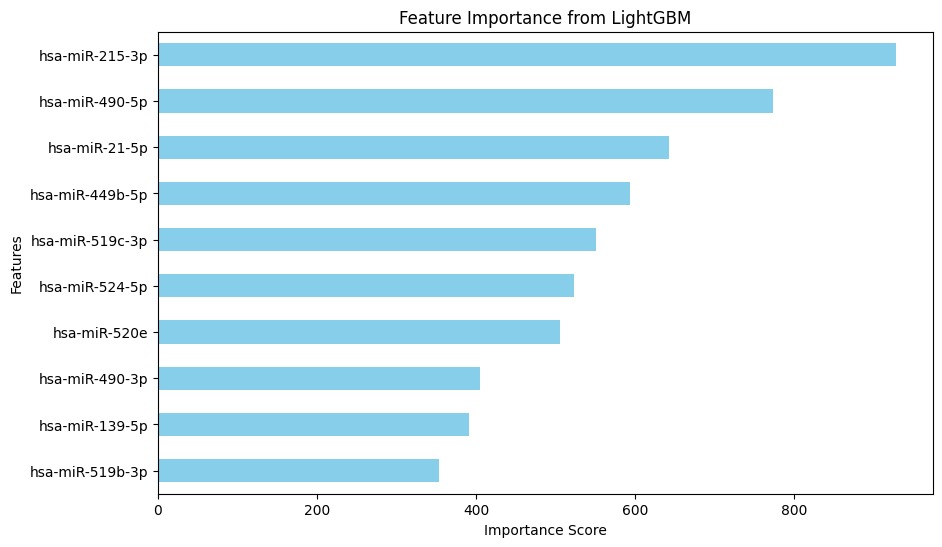

In [127]:
# Step 6: Plotting the feature importance
plt.figure(figsize=(10, 6))
top_importance_df['Importance'].plot(kind='barh', color='skyblue')
plt.title('Feature Importance from AdaBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
# Save the plot as a JPEG file with 300 DPI
plt.savefig('feature_importance_adaBoost.jpeg', dpi=300, format='jpeg')
plt.show()